In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
features = pd.read_csv("titanic.csv", index_col = 0)

In [5]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
features.shape

(891, 11)

In [8]:
features.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df= features.copy()
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Pclass 레이블별 갯수 및 차트표시
# 2. 생존자와 사망자 총 숫자 및 차트표시
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 숳ㅇ

<AxesSubplot:xlabel='Pclass', ylabel='count'>

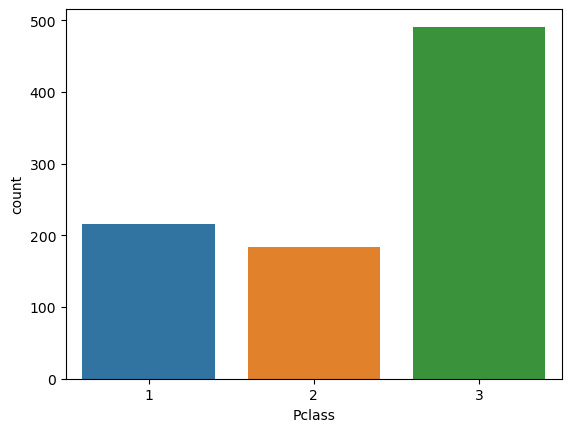

In [10]:
sns.countplot(x='Pclass', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

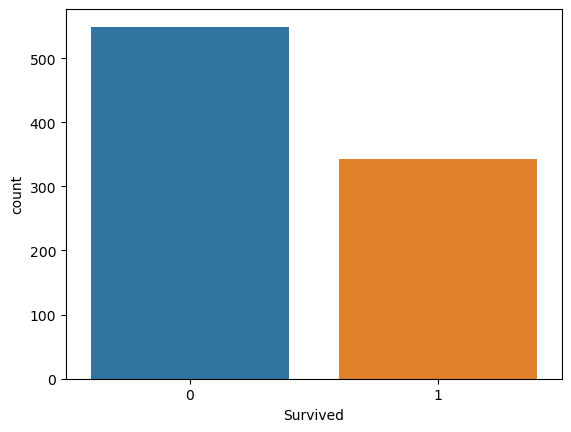

In [11]:
sns.countplot(x='Survived', data=df) # survived=1, didn't survive = 0

<AxesSubplot:xlabel='Survived', ylabel='count'>

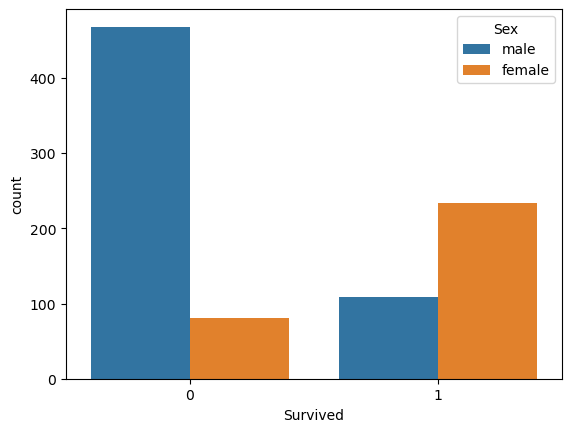

In [12]:
sns.countplot(x='Survived',hue='Sex',data=df) # survived=1, didn't survive = 0

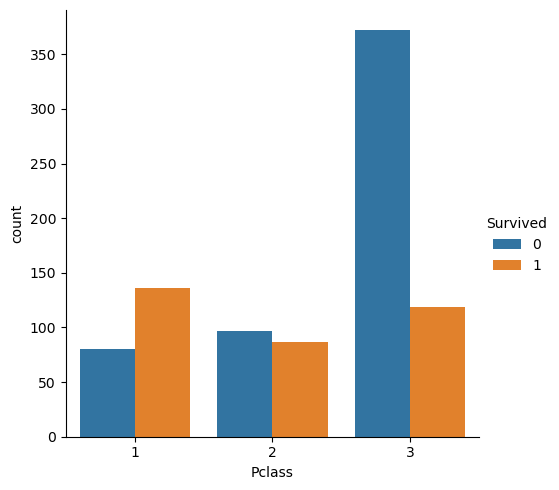

In [13]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=df)  # survived=1, didn't survive = 0

In [14]:
#Data preparation
#looking for null values and taking care of them

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return df[df['Pclass']==1]['Age'].median()
        elif Pclass==2:
            return df[df['Pclass']==2]['Age'].median()
        elif Pclass==3:
            return df[df['Pclass']==3]['Age'].median()
    else:
        return Age

In [16]:
df['Age']=df[['Age','Pclass']].apply(add_age,axis=1)

In [17]:
df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

In [18]:
df.drop('Cabin',axis=1,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,0


In [19]:
df.dropna(inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,0


In [20]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,24.0,1,2,23.4500


In [22]:
df = pd.concat([df,sex,embark],axis=1)

df_data = df.drop('Survived', axis=1)
label = df['Survived']

In [23]:
df_data

,Pclass,Age,SibSp,Parch,Fare,1,1,2
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,0
2,1,38.0,1,0,71.2833,0,1,0
3,3,26.0,0,0,7.9250,0,0,0
4,1,35.0,1,0,53.1000,0,0,0
5,3,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,1,0,0
888,1,19.0,0,0,30.0000,0,0,0
889,3,24.0,1,2,23.4500,0,0,0


In [24]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

[Text(155.1524256993007, 359.8736842105263, 'X[5] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(75.65734265734265, 340.4210526315789, 'X[0] <= 2.5\ngini = 0.384\nsamples = 312\nvalue = [81, 231]'),
 Text(29.135664335664334, 320.9684210526316, 'X[1] <= 2.5\ngini = 0.101\nsamples = 168\nvalue = [9, 159]'),
 Text(22.198601398601397, 301.5157894736842, 'X[4] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(19.423776223776223, 282.06315789473683, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(24.973426573426572, 282.06315789473683, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(36.07272727272727, 301.5157894736842, 'X[4] <= 28.856\ngini = 0.092\nsamples = 166\nvalue = [8, 158]'),
 Text(30.52307692307692, 282.06315789473683, 'X[4] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(27.748251748251747, 262.61052631578946, 'X[1] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(19.423776223776223, 243.15789473684208, 'X[2] <= 0.5\ngin

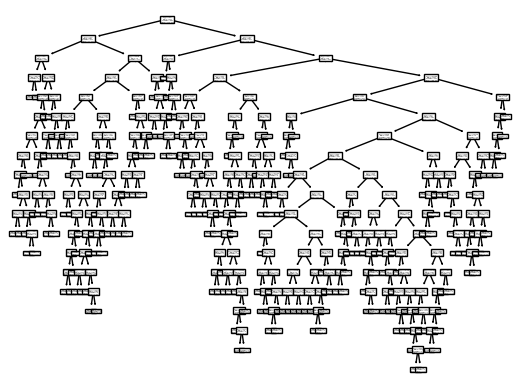

In [25]:
DT_clf = tree.DecisionTreeClassifier(random_state=0)
clf = DT_clf.fit(df_data, label)
tree.plot_tree(clf)

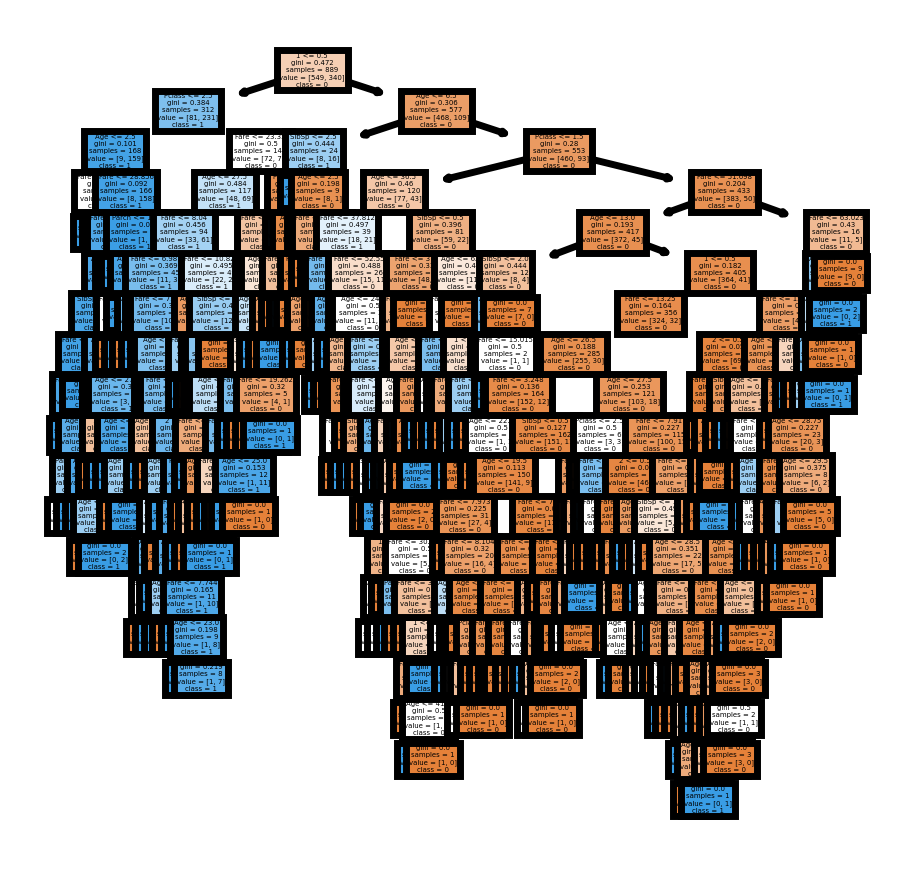

In [26]:
fn=list(df_data.columns)
cn=["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=500)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Titanic_DT.png')

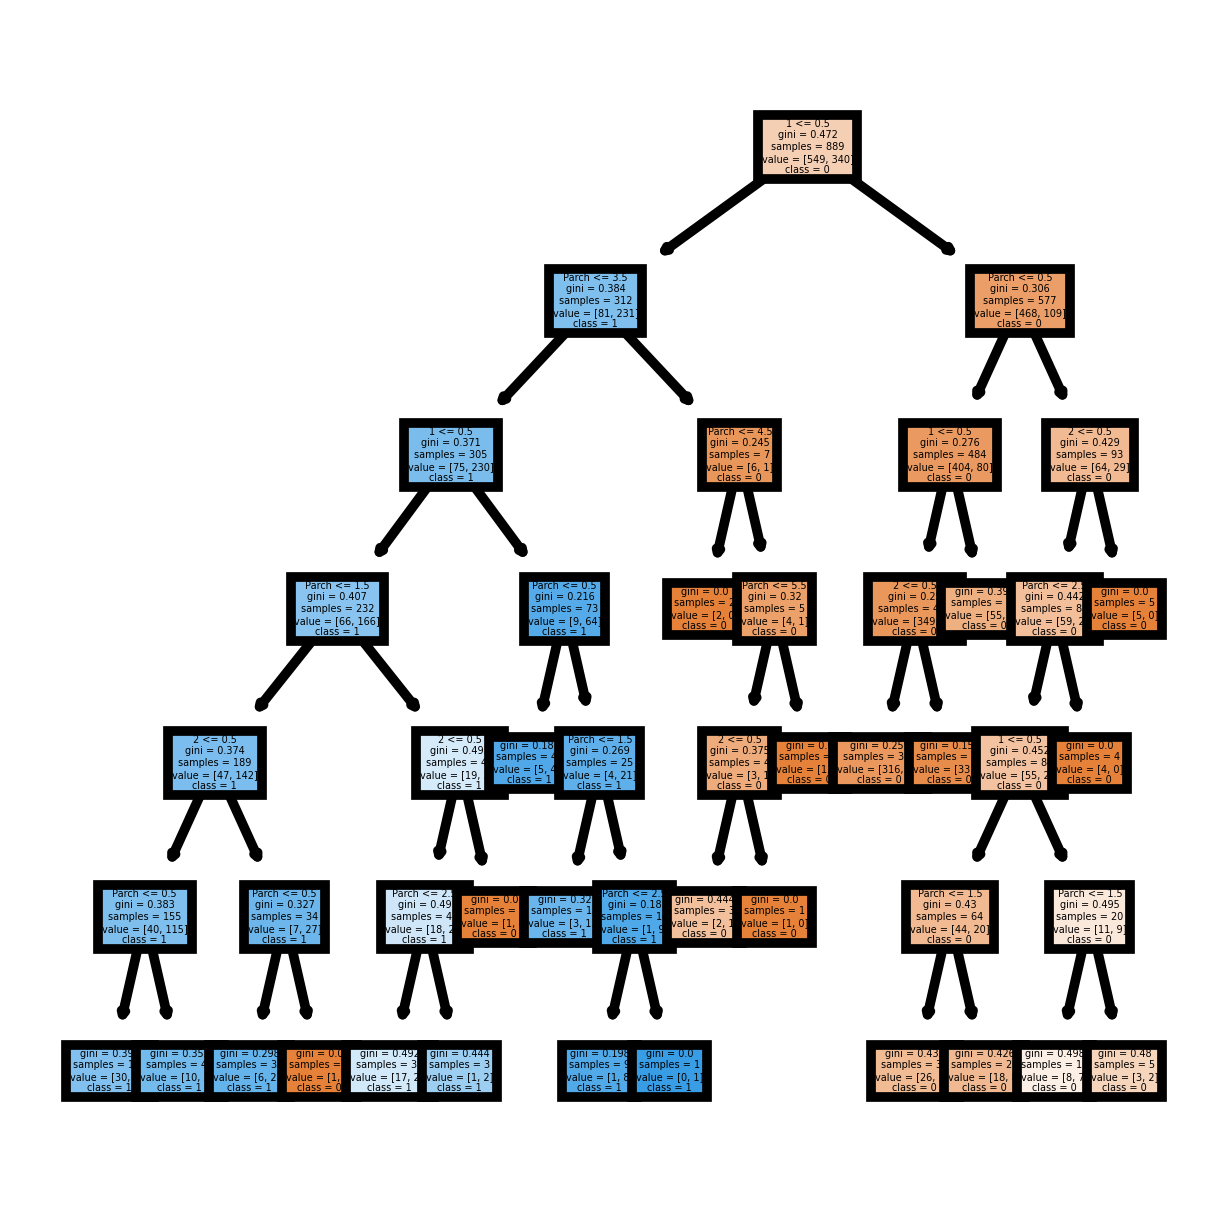

In [27]:

train_mini = df_data.drop('Age', axis=1)   # hash.remove this if you want to include it
train_mini = train_mini.drop('Fare', axis=1)  # hash.remove this if you want to include it
train_mini = train_mini.drop('SibSp', axis=1) # hash.remove this if you want to include it
train_mini = train_mini.drop('Pclass', axis=1) # hash.remove this if you want to include it

DT_mini_clf = tree.DecisionTreeClassifier(random_state=0)
clf_mini = DT_mini_clf.fit(train_mini, label)

fn=list(train_mini.columns)
cn=["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=700)
tree.plot_tree(clf_mini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
 #Decision Tree Score
DT_score = cross_val_score(DT_clf, df_data, label, cv=k_fold, n_jobs=1, scoring='accuracy')
print(DT_score)
round(np.mean(DT_score)*100, 2)

[0.71910112 0.75280899 0.7752809  0.80898876 0.80898876 0.80898876
 0.82022472 0.6741573  0.79775281 0.82954545]


77.96

In [29]:
RF_clf = RandomForestClassifier(n_estimators=13)

RF_score = cross_val_score(RF_clf, df_data, label, cv=k_fold, n_jobs=1, scoring='accuracy')
print(RF_score)

[0.74157303 0.7752809  0.85393258 0.84269663 0.84269663 0.79775281
 0.84269663 0.75280899 0.82022472 0.78409091]


In [30]:
 #Random Forest Score
round(np.mean(RF_score)*100, 2)

80.54

In [31]:
min_age=min(df.Age)
max_age=max(df.Age)
min_fare=min(df.Fare)
max_fare=max(df.Fare)

In [32]:
df.Age = (df.Age-min_age)/(max_age-min_age)
df.Fare = (df.Fare-min_fare)/(max_fare-min_fare)

In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
1           0
1           0
2           0
dtype: int64

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,1,1,2
PassengerId,,,,,,,,,
1,0,3,0.271174,1,0,0.014151,1,0,0
2,1,1,0.472229,1,0,0.139136,0,1,0
3,1,3,0.321438,0,0,0.015469,0,0,0
4,1,1,0.434531,1,0,0.103644,0,0,0
5,0,3,0.434531,0,0,0.015713,1,0,0


In [35]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
#feature scaling


from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [39]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [40]:
#training the model


from sklearn.svm import SVC

SVC_model= SVC()

In [41]:
SVC_model.fit(scaled_X_train, y_train)

SVC()

In [42]:
#predicting test

y_pred= SVC_model.predict(scaled_X_test)

In [43]:
#testing the model

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[156,   7],
       [ 34,  70]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       163
           1       0.91      0.67      0.77       104

    accuracy                           0.85       267
   macro avg       0.87      0.82      0.83       267
weighted avg       0.86      0.85      0.84       267



In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.82      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [50]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.8164794007490637


    K-NEAREST NEIGHBORS

In [51]:
knn_model= KNeighborsClassifier(n_neighbors=13)

In [52]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [53]:
y_pred= knn_model.predict(scaled_X_test)

In [54]:
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred})

,Y_Test,Y_Pred
PassengerId,,
512,0,0
614,0,0
616,1,1
338,1,1
719,0,0
...,...,...
793,0,0
829,1,0
733,0,0


In [55]:
accuracy_score(y_test, y_pred)

0.8614232209737828

In [56]:
confusion_matrix(y_test, y_pred)

array([[156,   7],
       [ 30,  74]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       163
           1       0.91      0.71      0.80       104

    accuracy                           0.86       267
   macro avg       0.88      0.83      0.85       267
weighted avg       0.87      0.86      0.86       267



In [58]:
test_error_rate= []


for k in range (1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [59]:
test_error_rate

[0.26217228464419473,
 0.20973782771535576,
 0.18726591760299627,
 0.1910112359550562,
 0.17602996254681647,
 0.1685393258426966,
 0.16104868913857673,
 0.1573033707865169,
 0.16479400749063666,
 0.17602996254681647,
 0.16479400749063666,
 0.14981273408239704,
 0.13857677902621723,
 0.15355805243445697,
 0.1573033707865169,
 0.16104868913857673,
 0.1573033707865169,
 0.15355805243445697,
 0.1573033707865169,
 0.14981273408239704,
 0.15355805243445697,
 0.16104868913857673,
 0.1685393258426966,
 0.16104868913857673,
 0.16479400749063666,
 0.16104868913857673,
 0.16479400749063666,
 0.16104868913857673,
 0.16479400749063666]

Text(0.5, 0, 'K Value')

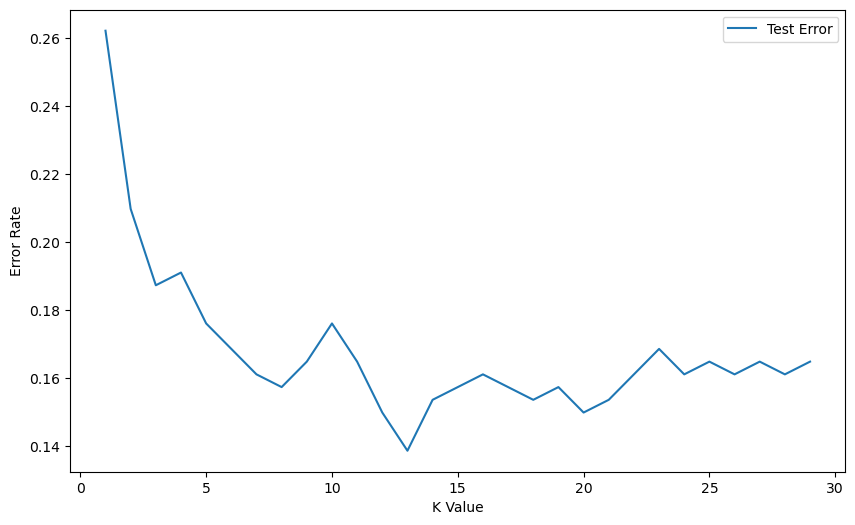

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')